## Count Commits

In [1]:
import duckdb
import matplotlib.pyplot as plt

# Connexion à DuckDB
conn = duckdb.connect('parquet_directory/data_lake.duckdb')

# Requête SQL pour récupérer le nombre de commits par contributeur
query = """
SELECT commit.author.name AS author_name, 
       COUNT(commit.author.name) AS commit_count
FROM main_silver.commits_transformed
GROUP BY commit.author.name
ORDER BY commit_count DESC
LIMIT 10
"""

result = conn.execute(query).fetchall()
conn.close()

authors, commit_counts = zip(*result)

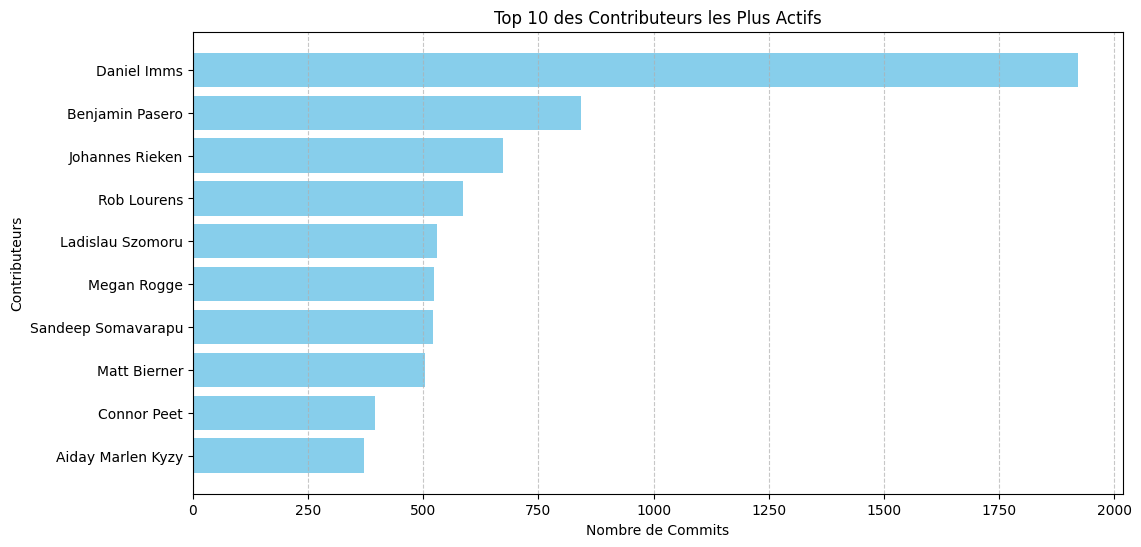

In [2]:
plt.figure(figsize=(12, 6))
plt.barh(authors, commit_counts, color='skyblue')
plt.xlabel("Nombre de Commits")
plt.ylabel("Contributeurs")
plt.title("Top 10 des Contributeurs les Plus Actifs")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Dates

In [3]:
from datetime import datetime

conn = duckdb.connect('parquet_directory/data_lake.duckdb')

query_commits_by_week = """
SELECT commit_week, commit_count
FROM main_gold.commits_date
ORDER BY commit_week ASC
"""

result = conn.execute(query_commits_by_week).fetchall()

conn.close()

weeks, commit_counts = zip(*result)

weeks = [datetime.strptime(str(week), '%Y-%m-%d').date() for week in weeks]

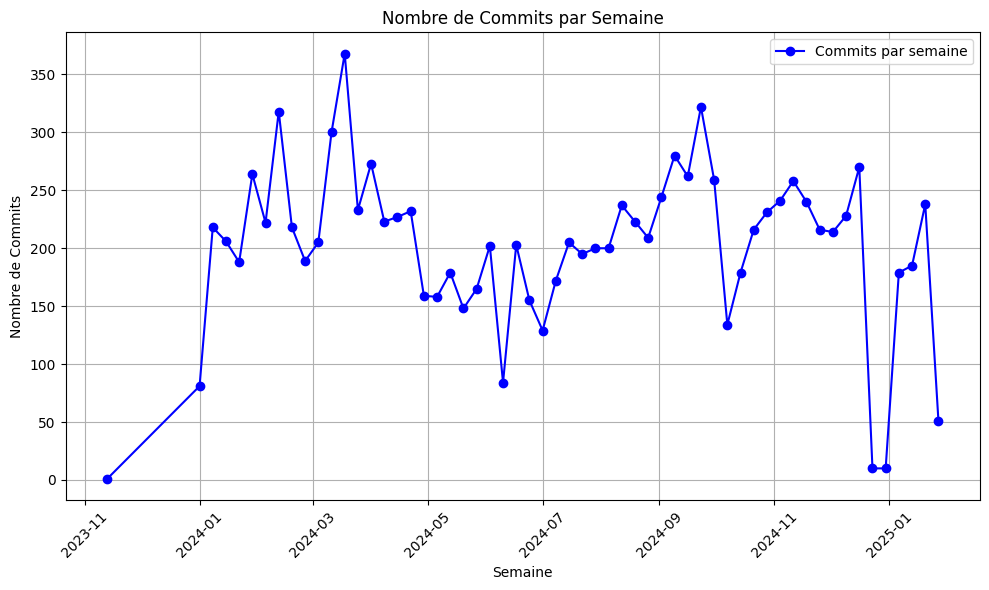

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(weeks, commit_counts, marker='o', linestyle='-', color='b', label='Commits par semaine')

plt.title('Nombre de Commits par Semaine')
plt.xlabel('Semaine')
plt.ylabel('Nombre de Commits')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()